In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carraga os dados 
data = pd.read_csv('Iris.csv')
# exibe as 5 primeiras linhas
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# verifica quais são as espécies
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
# transformas especies em valores númericos para aplicar a classificação
# função que transforma os dados 
from sklearn.preprocessing import LabelEncoder 
# instancia a funcao
label_enconder = LabelEncoder()
#aplica a função e cria uma nova coluna com os dados
data['Species_numeric'] = label_enconder.fit_transform(data['Species'])
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_numeric
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [5]:
# verifica os códigos atribuidos a cada espécie
data['Species_numeric'].value_counts()

2    50
1    50
0    50
Name: Species_numeric, dtype: int64

                       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id               1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm    0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm    -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm    0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm     0.899759       0.817954     -0.356544       0.962757   
Species_numeric  0.942830       0.782561     -0.419446       0.949043   

                 PetalWidthCm  Species_numeric  
Id                   0.899759         0.942830  
SepalLengthCm        0.817954         0.782561  
SepalWidthCm        -0.356544        -0.419446  
PetalLengthCm        0.962757         0.949043  
PetalWidthCm         1.000000         0.956464  
Species_numeric      0.956464         1.000000  


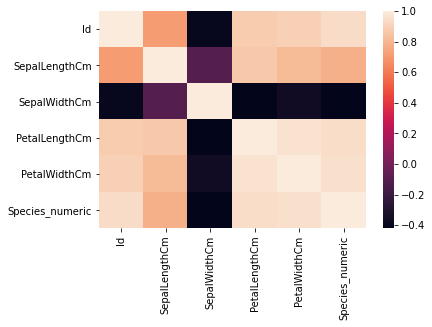

In [6]:
print(data.corr())
sns.heatmap(data.corr(),cbar=True)

In [7]:
data.drop('Id',axis='columns', inplace=True)

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm         1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm         -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm         0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm          0.817954     -0.356544       0.962757      1.000000   
Species_numeric       0.782561     -0.419446       0.949043      0.956464   

                 Species_numeric  
SepalLengthCm           0.782561  
SepalWidthCm           -0.419446  
PetalLengthCm           0.949043  
PetalWidthCm            0.956464  
Species_numeric         1.000000  


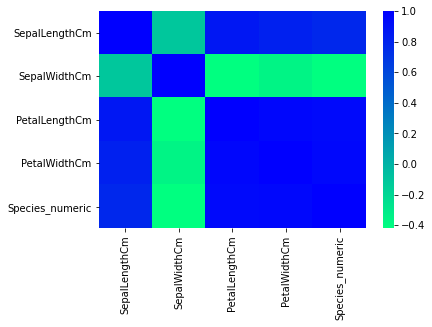

In [8]:
print(data.corr())
sns.heatmap(data.corr(),cbar=True,cmap="winter_r")

In [9]:
# vamos ver os nomes das colunas
data.columns.values

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_numeric'], dtype=object)

In [12]:
#Separa os atributos da classe
X = data.filter(items=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
y = data.filter(items=['Species_numeric'])

In [13]:
X.shape

(150, 4)

In [14]:
y.shape

(150, 1)

In [29]:
#Separa em treino e teste
from sklearn.model_selection import train_test_split
X_treino,X_test,y_treino,y_test = train_test_split(X,y,test_size =0.3,random_state=40)

In [30]:
# Aplicando nosso modelo de classificação 
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(n_estimators=150,criterion='entropy',random_state=40) #rf = random forest

In [31]:
#aplicando o modelo 
modelo_rf.fit(X_treino,y_treino)

<ipython-input-31-b7bdbae251fb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_rf.fit(X_treino,y_treino)


RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=40)

In [33]:
#eficácia do modelo
modelo_rf.score(X_test,y_test)*100

100.0